In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"C:\Users\Xps\Downloads\weather_data.csv")
print(data)

         Date  Rainfall  Temperature  Humidity  WindSpeed
0  2024-01-01      12.3         29.1        82         14
1  2024-01-02       0.0         30.0        75         10
2  2024-01-03       5.2         28.4        79         11
3  2024-01-04      18.6         27.9        84         13
4  2024-01-05       0.0         31.2        71          9


In [5]:
# Convert Date column to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Inspect the dataset
print("Data Preview:\n", data.head())
print("\nData Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Data Preview:
         Date  Rainfall  Temperature  Humidity  WindSpeed
0 2024-01-01      12.3         29.1        82         14
1 2024-01-02       0.0         30.0        75         10
2 2024-01-03       5.2         28.4        79         11
3 2024-01-04      18.6         27.9        84         13
4 2024-01-05       0.0         31.2        71          9

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         5 non-null      datetime64[ns]
 1   Rainfall     5 non-null      float64       
 2   Temperature  5 non-null      float64       
 3   Humidity     5 non-null      int64         
 4   WindSpeed    5 non-null      int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 332.0 bytes
None

Summary Statistics:
                      Date   Rainfall  Temperature   Humidity  WindSpeed
count          

In [7]:
average_rainfall = sum(data["Rainfall"]) / len(data["Rainfall"])
print(average_rainfall)

7.220000000000001


In [10]:
heavy_rain_days = data[data["Rainfall"] > 10]
count = len(heavy_rain_days)
print("Number of days with rainfall > 10 mm:", count)

Number of days with rainfall > 10 mm: 2


In [11]:
print(heavy_rain_days)

        Date  Rainfall  Temperature  Humidity  WindSpeed
0 2024-01-01      12.3         29.1        82         14
3 2024-01-04      18.6         27.9        84         13


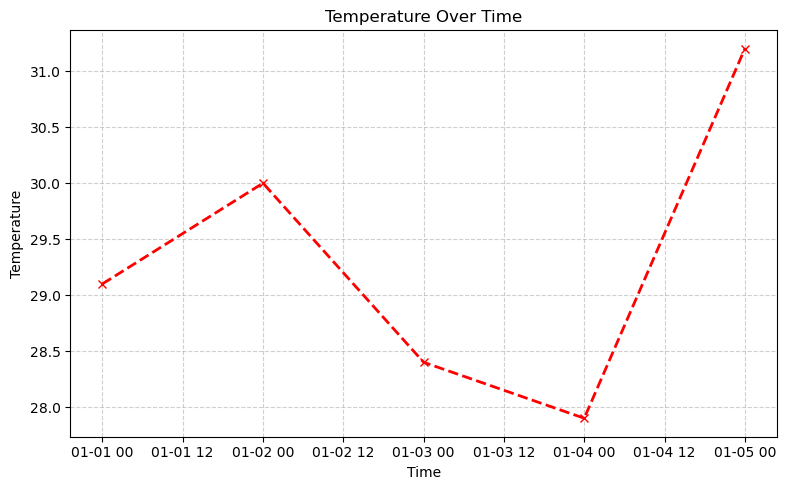

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(data["Date"], data["Temperature"], marker="x", linestyle="--", color="red", linewidth=2)
plt.title("Temperature Over Time")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [14]:
def classify_rain(mm):
    if mm > 10:
        return "Heavy Rain"
    elif mm > 0:
        return "Light Rain"
    else:
        return "Dry"

data["WeatherType"] = data["Rainfall"].apply(classify_rain)
print(data)

        Date  Rainfall  Temperature  Humidity  WindSpeed WeatherType
0 2024-01-01      12.3         29.1        82         14  Heavy Rain
1 2024-01-02       0.0         30.0        75         10         Dry
2 2024-01-03       5.2         28.4        79         11  Light Rain
3 2024-01-04      18.6         27.9        84         13  Heavy Rain
4 2024-01-05       0.0         31.2        71          9         Dry


In [15]:
print(data["WeatherType"].value_counts())

WeatherType
Heavy Rain    2
Dry           2
Light Rain    1
Name: count, dtype: int64


In [16]:
weather_counts = data["WeatherType"].value_counts()
weather_counts

WeatherType
Heavy Rain    2
Dry           2
Light Rain    1
Name: count, dtype: int64

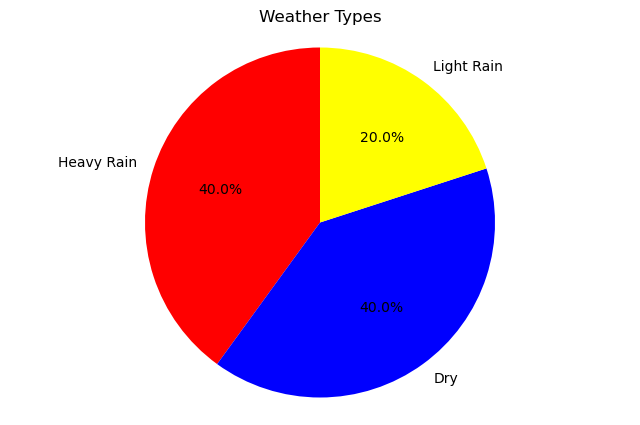

In [21]:
plt.figure(figsize=(8, 5))
plt.pie(weather_counts,
        labels=weather_counts.index,
        autopct="%1.1f%%",
        startangle=90,
        colors=["red", "blue", "yellow"])
plt.title("Weather Types")
plt.axis("equal")
plt.show()

In [22]:
avg_temp_by_weather = data.groupby("WeatherType")["Temperature"].mean()
print(avg_temp_by_weather)

WeatherType
Dry           30.6
Heavy Rain    28.5
Light Rain    28.4
Name: Temperature, dtype: float64


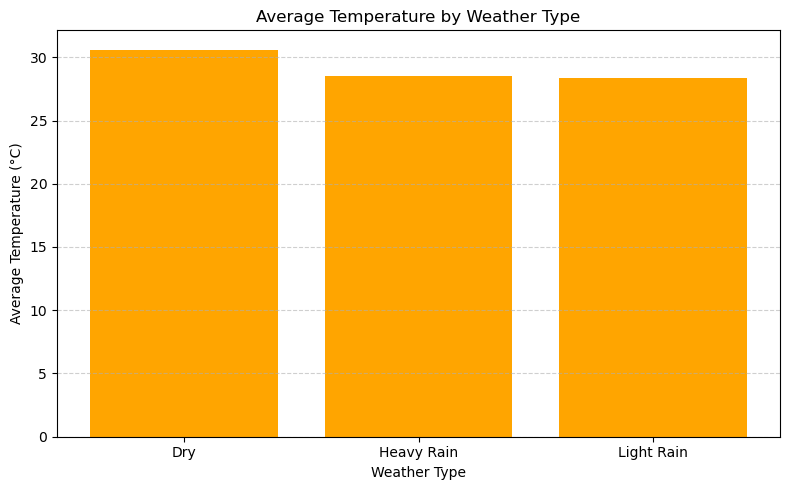

In [23]:
plt.figure(figsize=(8, 5))
plt.bar(avg_temp_by_weather.index, avg_temp_by_weather.values, color="orange")
plt.title("Average Temperature by Weather Type")
plt.xlabel("Weather Type")
plt.ylabel("Average Temperature (°C)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
